/Users/carlal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


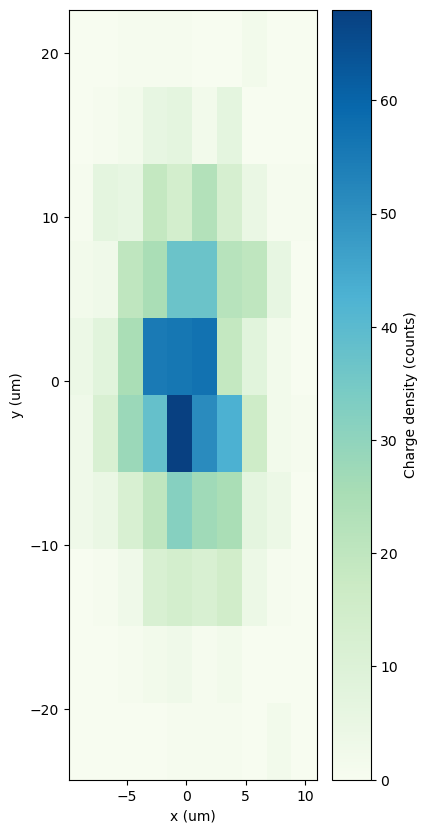

In [1]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageNonlinear1D, BeamDeliverySystemFACET2Basic, SpectrometerFACET2Basic, LinacExperiment

# define beam
source = SourceBasic()
source.L = 0.5 # [m]
source.Q = -1e-9 # [C]
source.E0 = 10e9 # [eV]
source.sigE = 0.01*source.E0 # [eV]
source.sigz = 20e-6 # [m]
source.z = -80e-6 # [m]
source.emitnx = 20e-6 # [m rad]
source.emitny = 5e-6 # [m rad]
source.betax = 50e-3 # [m]
source.betay = source.betax
source.Npart = 1000

# define beamline
bds = BeamDeliverySystemFACET2Basic()
bds.beta_waist = 0.05 # [m]
bds.s_waist = 0 # [m]

# define stage
stage = StageNonlinear1D()
stage.deltaE = 2e9 # [eV]
stage.L = 0.1 # [m]
stage.n0 = 1e22 # [m^-3]
stage.kRb = 2.5

# define spectrometer
spectrometer = SpectrometerFACET2Basic()
spectrometer.Bdip = -1 # [T]
spectrometer.Eimg = source.E0
spectrometer.s_obj = 0 # [m]

# define experiment
experiment = LinacExperiment(source, bds, stage, spectrometer)

# track particles
experiment.track(quiet=True)

# see output
experiment.plotSpectrometer()